# SMS Spam Collection Dataset

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. 

# Content

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link].
-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link].
-> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link].
-> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches: 

# Acknowledgements

The original dataset can be found here. The creators would like to note that in case you find the dataset useful, please make a reference to previous paper and the web page: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ in your papers, research, etc.

We offer a comprehensive study of this corpus in the following paper. This work presents a number of statistics, studies and baseline results for several machine learning methods.

Almeida, T.A., GÃ³mez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011.

# Inspiration

Can you use this dataset to build a prediction model that will accurately classify which texts are spam?


link of datasets

https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns 
from sklearn import feature_extraction
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import nltk


In [23]:
data=pd.read_csv(r"C:\Users\erfan\Desktop\data science\ML2\projects\sms spam\spam.csv", encoding='cp863')

In [24]:
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [25]:

data.isnull().sum()


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
some columns in this datasets is not usable for that we drop it

In [26]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

change name of vi to label and v2 to text

In [27]:
data.rename(columns={'v1':'label','v2':'text'},inplace=True)

shape of data 5572 ,2 mean 5572 sample and 2 features

In [28]:
data.shape

(5572, 2)

no null value in dataset

In [29]:

data.isnull().sum()


label    0
text     0
dtype: int64

In [30]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot:xlabel='label', ylabel='count'>

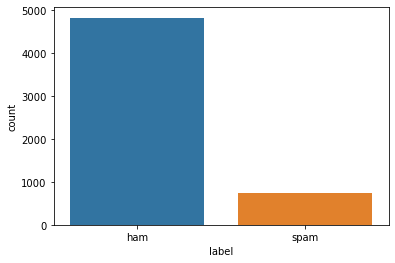

In [31]:
sns.countplot(data=data,x='label')

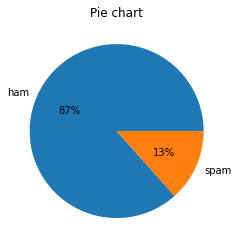

In [32]:
count_Class=pd.value_counts(data["label"], sort= True)
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

change label of ham to 0 and spam to 1

In [33]:
data['label'] = data.label.map({'ham':0, 'spam':1})


In [34]:
data.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


targeting phase

In [35]:
target=data['label']
data.drop('label',axis=1,inplace=True)

## Text processing

comment part of cleaning url because maybe we have spam url in text

In [36]:
import re
# def clean_url(review_text):
#   return re.sub(r'http\s+','',review_text)
# data['text']=data['text'].apply(clean_url)

if we have not alhpa bet in our text clean it

In [37]:
def clean_non_alpha(review_text):
  return re.sub(r'^a-zA-Z',' ',review_text)
data['text']=data['text'].apply(clean_non_alpha)

lower our text

In [38]:
def clean_lower(review_text):
  return str(review_text).lower()
data['text']=data['text'].apply(clean_lower)

word_tokenize,sent_tokenize part


In [39]:
from nltk.tokenize import word_tokenize,sent_tokenize
nltk.download('punkt')

def clean_token(review_text):

  return word_tokenize(review_text)

data['text']=data['text'].apply(clean_token)

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


cleaning stop words

In [40]:
from nltk.stem.snowball import stopwords
import nltk
nltk.download('stopwords')
stop_word=set(stopwords.words('english'))
def clean_stopwords(token):
  return [item for item in token if item not in stop_word ]
data['text']=data['text'].apply(clean_stopwords)

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


Stemming usually refers to a crude process that chops off the ends of words in the hope of achieving this goal correctly
most of the time, and often includes the removal of derivational units (the obtained element is known as the stem).


In [41]:
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()
import nltk
nltk.download('wordnet')
import nltk
nltk.download('omw-1.4')
def clean_lemma(token):
  return [lemma.lemmatize(word=w,pos='v')for w in token ]
data['text']=data['text'].apply(clean_lemma)


[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


lemmatization consists in doing things properly with the use of a vocabulary and morphological analysis of words, to
return the base or dictionary form of a word, which is known as the lemma.

In [42]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
def clean_ste(token):
  return [stemmer.stem(i) for i in token]
data['text']=data['text'].apply(clean_ste)


if we have inder 2 lenght in our text delet it

In [43]:
def clean_len(token):
  return [i for i in token if len(i)>2]
data['text']=data['text'].apply(clean_len)


convert to string phase

In [44]:
def convert_tostring(list_rev):
  return ' '.join(list_rev)
data['text']=data['text'].apply(convert_tostring)


## PCA

TruncatedSVD ==> This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently.

In [47]:
from sklearn.decomposition import TruncatedSVD


In [48]:
tr_svd = TruncatedSVD(n_components=100,random_state=42)

In [49]:
tr_svd=tr_svd.fit(data)

In [50]:
print(tr_svd.explained_variance_ratio_)

[0.01106847 0.01441624 0.01037285 0.0087248  0.00822703 0.00796742
 0.00787895 0.0075906  0.00720659 0.00697309 0.00674791 0.00665672
 0.00624343 0.00613628 0.0058599  0.00567942 0.00555266 0.0055297
 0.0053351  0.0051645  0.00505582 0.00487887 0.00477599 0.00472918
 0.00467213 0.00460323 0.00448337 0.00438607 0.00432669 0.00425948
 0.00418209 0.00406465 0.00398798 0.00395426 0.0039193  0.0038762
 0.00381623 0.003765   0.00376232 0.00369409 0.00364056 0.00359402
 0.00356077 0.00351227 0.00347748 0.0034065  0.00334484 0.00332496
 0.00330372 0.003248   0.00318624 0.0031305  0.00309471 0.00302811
 0.00300925 0.00296198 0.00295077 0.00290843 0.00288257 0.00285977
 0.00281156 0.00277404 0.00275247 0.00272082 0.00269116 0.00263232
 0.00260442 0.00259338 0.00256313 0.00255457 0.00249144 0.00246678
 0.00245568 0.0024246  0.00238692 0.00237753 0.00233873 0.0023223
 0.00229349 0.00224233 0.00223269 0.00221206 0.00220478 0.00219339
 0.00217481 0.00215674 0.00211673 0.00209447 0.00205408 0.0020459

In [51]:
print(np.round(tr_svd.explained_variance_ratio_ * 100, 2))

[1.11 1.44 1.04 0.87 0.82 0.8  0.79 0.76 0.72 0.7  0.67 0.67 0.62 0.61
 0.59 0.57 0.56 0.55 0.53 0.52 0.51 0.49 0.48 0.47 0.47 0.46 0.45 0.44
 0.43 0.43 0.42 0.41 0.4  0.4  0.39 0.39 0.38 0.38 0.38 0.37 0.36 0.36
 0.36 0.35 0.35 0.34 0.33 0.33 0.33 0.32 0.32 0.31 0.31 0.3  0.3  0.3
 0.3  0.29 0.29 0.29 0.28 0.28 0.28 0.27 0.27 0.26 0.26 0.26 0.26 0.26
 0.25 0.25 0.25 0.24 0.24 0.24 0.23 0.23 0.23 0.22 0.22 0.22 0.22 0.22
 0.22 0.22 0.21 0.21 0.21 0.2  0.2  0.2  0.2  0.19 0.19 0.19 0.19 0.19
 0.19 0.18]


In [52]:
print(tr_svd.singular_values_)

[29.76400389 25.82172058 22.13530559 19.86828176 19.49285977 18.98183995
 18.88676986 18.54048873 18.09783098 17.75890571 17.47586155 17.34913896
 16.81036669 16.65484989 16.29036591 16.02819071 15.92303583 15.82997369
 15.53438805 15.29934135 15.12904986 14.8528013  14.69716146 14.63762552
 14.53279983 14.42666232 14.24958812 14.0905881  13.99540198 13.87905336
 13.75047701 13.55484722 13.46275263 13.38388653 13.3386821  13.23964352
 13.13448319 13.07279319 13.04106133 12.92230544 12.83935429 12.74603444
 12.68702269 12.60019392 12.53776732 12.40950367 12.29826492 12.26125762
 12.22051255 12.11690952 12.00117404 11.91386947 11.83675889 11.70091618
 11.67025503 11.61251816 11.55110098 11.47234175 11.419853   11.37478838
 11.27368195 11.19808138 11.16695555 11.0900302  11.02942442 10.91170636
 10.85787241 10.82718723 10.77202142 10.74665408 10.62183439 10.56249898
 10.53650339 10.47193557 10.38919118 10.36826668 10.28649371 10.25048752
 10.18270169 10.07253684 10.04615529 10.00919941  9

In [53]:
total_var = np.cumsum(tr_svd.explained_variance_ratio_) * 100

for i in range(100):
    print("PC {:2d}, explained var: {:.2f}".format(i+1, total_var[i]))

PC  1, explained var: 1.11
PC  2, explained var: 2.55
PC  3, explained var: 3.59
PC  4, explained var: 4.46
PC  5, explained var: 5.28
PC  6, explained var: 6.08
PC  7, explained var: 6.87
PC  8, explained var: 7.62
PC  9, explained var: 8.35
PC 10, explained var: 9.04
PC 11, explained var: 9.72
PC 12, explained var: 10.38
PC 13, explained var: 11.01
PC 14, explained var: 11.62
PC 15, explained var: 12.21
PC 16, explained var: 12.77
PC 17, explained var: 13.33
PC 18, explained var: 13.88
PC 19, explained var: 14.42
PC 20, explained var: 14.93
PC 21, explained var: 15.44
PC 22, explained var: 15.93
PC 23, explained var: 16.40
PC 24, explained var: 16.88
PC 25, explained var: 17.34
PC 26, explained var: 17.80
PC 27, explained var: 18.25
PC 28, explained var: 18.69
PC 29, explained var: 19.12
PC 30, explained var: 19.55
PC 31, explained var: 19.97
PC 32, explained var: 20.37
PC 33, explained var: 20.77
PC 34, explained var: 21.17
PC 35, explained var: 21.56
PC 36, explained var: 21.95
PC 

## t-tse

In [54]:
from sklearn.manifold import TSNE # use tsne for the Dimensionality reduction

In [55]:

tsne2 = TSNE(n_components=2,random_state=42)

tsne_data = tsne2.fit_transform(data);

tsne_data = np.vstack((tsne_data.T, target)).T


C:\Users\erfan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\erfan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


C:\Users\erfan\AppData\Local\Temp\ipykernel_12124\3679332078.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


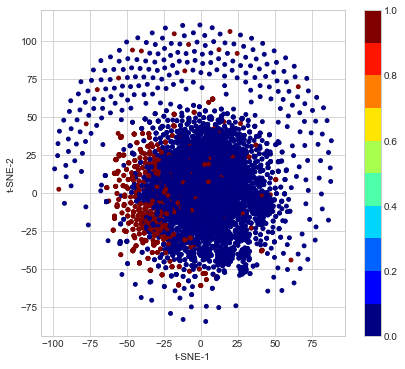

In [56]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (15,6))
c_map = plt.cm.get_cmap('jet', 10)



plt.subplot(1, 2, 2)
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], s = 15, cmap = c_map , c = target)
plt.colorbar()
plt.xlabel('t-SNE-1') , plt.ylabel('t-SNE-2')


plt.show()

## Modeling



In [58]:
X_train,X_test,y_train,y_test=train_test_split(data,target,random_state=42,test_size=0.2,stratify=target)

In [59]:
svc=SVC(C=0.5,kernel='rbf',verbose=True)
svc.fit(X_train,y_train)
print(svc.score(X_train,y_train))


[LibSVM]0.9908009872111285


In [60]:

from sklearn.metrics import classification_report

y_pred=svc.predict(X_test)
# Print classification report after a train/test split:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



[[966   0]
 [ 36 113]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



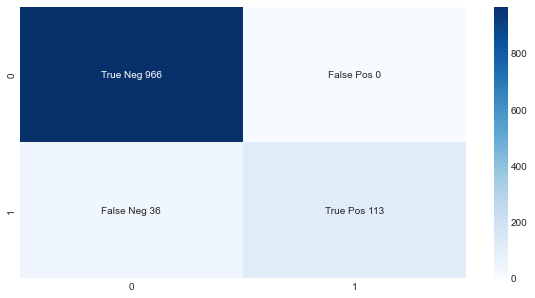

In [61]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
plt.figure(figsize=(10,5))
labels = ['True Neg 966','False Pos 0','False Neg 36','True Pos 113']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()

this is where we have right predict 

In [62]:
corrext_idx=np.where(y_test==y_pred)
print(corrext_idx)

(array([   0,    1,    2, ..., 1112, 1113, 1114], dtype=int64),)


this is where we don't  have right predict useage for the where and why we dont have right predict help to improve and develope our model to have better performance

In [63]:
incorrect_idx=np.where(y_test!=y_pred)
print(incorrect_idx)


(array([  44,  122,  123,  165,  196,  219,  232,  235,  242,  253,  258,
        265,  362,  393,  418,  439,  454,  455,  467,  478,  482,  539,
        577,  589,  606,  721,  754,  812,  823,  826,  839,  841,  852,
        946, 1035, 1069], dtype=int64),)


In [64]:
X_test.shape

(1115, 6976)

In [65]:
y_test.size

1115

In [ ]:
use knn for classifiere

In [66]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
classifier.score(X_train, y_train)

C:\Users\erfan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9248373345299529

In [67]:
y_pred=classifier.predict(X_test)


C:\Users\erfan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[966   0]
 [ 95  54]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       966
           1       1.00      0.36      0.53       149

    accuracy                           0.91      1115
   macro avg       0.96      0.68      0.74      1115
weighted avg       0.92      0.91      0.90      1115



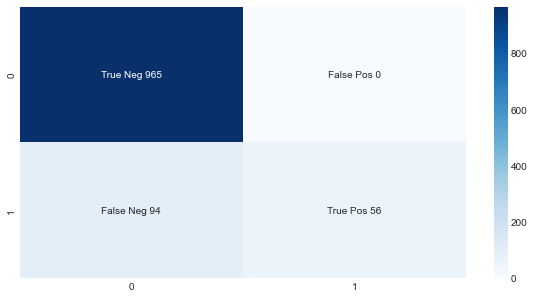

In [68]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
plt.figure(figsize=(10,5))
labels = ['True Neg 965','False Pos 0','False Neg 94','True Pos 56']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier

In [70]:
ff=LogisticRegression(random_state=0)
ff.fit(X_train, y_train)
ff.score(X_test, y_test)

0.9811659192825112

In [71]:
X_train.shape


(4457, 6976)

In [72]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
("kmeans", KMeans(n_clusters=300)),  #300 cluster == LogisticRegression score 
("log_reg", LogisticRegression()),
])

pipeline.fit(X_train, y_train)

C:\Users\erfan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('kmeans', KMeans(n_clusters=300)),
                ('log_reg', LogisticRegression())])

In [73]:
pipeline.score(X_test, y_test)

0.9802690582959641

In [74]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(2, 10))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.9s
[CV] END ...............................kmeans__n_clusters=2; total time=   1.5s
[CV] END ...............................kmeans__n_clusters=2; total time=   1.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   2.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   1.6s
[CV] END ...............................kmeans__n_clusters=3; total time=   1.5s
[CV] END ...............................kmeans__n_clusters=4; total time=   1.9s
[CV] END ...............................kmeans__n_clusters=4; total time=   2.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   2.5s
[CV] END ...............................kmeans__n_clusters=5; total time=   2.7s
[CV] END ...............................kmeans__n_clusters=5; total time=   2.6s
[CV] END ...............................kmeans__n

C:\Users\erfan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................kmeans__n_clusters=8; total time=   3.7s


C:\Users\erfan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................kmeans__n_clusters=9; total time=   3.9s


C:\Users\erfan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................kmeans__n_clusters=9; total time=   4.4s


C:\Users\erfan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................kmeans__n_clusters=9; total time=   4.6s


C:\Users\erfan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=300)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(2, 10)}, verbose=2)

In [75]:
grid_clf.best_params_


{'kmeans__n_clusters': 9}

In [76]:
grid_clf.score(X_test, y_test)

0.957847533632287